# Smartphones Price Prediction
# Name : Mohammed Said Salim Al Abri
# ID: 120615

In [ ]:
import pandas as pd
import numpy as np
# Preprocessing 
from sklearn.preprocessing import MinMaxScaler
# Classification 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
# model selection
from sklearn.model_selection import train_test_split, GridSearchCV
# evaluation performance 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# Plotting
import seaborn as sb
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# run time
import time

## Project Goal 

In this project, we are estimating the price range of the mobile device based on its specifications, such as its battery life, 3G connectivity, wifi, Bluetooth, and RAM. And also compare the price between brands in terms of the same specifications.

# Representation and Preprocessing 

## Load dataset and overview it

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load the smartphone dataset
df_mobile = pd.read_csv("/content/drive/MyDrive/COMP4603/MLproject/train.csv")

In [ ]:
df_mobile

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
df_mobile["price_range"].unique()

array([1, 2, 3, 0])

In [ ]:
# check if there are string in data
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Dataset columns:
1. battery_power : Total energy a battery can store in one time measured in mAh
2. blue : Has bluetooth or not
3. clock_speed : speed at which microprocessor executes instructions
4. dual_sim : Has dual sim support or not
5. fc : Front Camera mega pixels
6. four_g : Has 4G or not
7. int_memory : Internal Memory in Gigabytes
8. m_dep : Mobile Depth in cm
9. mobile_wt : Weight of mobile phone
10. n_cores : Number of cores of processor
11. pc : Primary Camera mega pixels
12. px_height : Pixel Resolution Height
13. px_width : Pixel Resolution Width
14. ram : Random Access Memory in Megabytes
15. sc_h : Screen Height of mobile in cm
16. sc_w : Screen Width of mobile in cm
17. talk_time : longest time that a single battery charge will last when you are
18. three_g : Has 3G or not
19. touch_screen : Has touch screen or not
20. wifi : Has wifi or not

In [ ]:
# check if there mssing value
df_mobile.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# display dataset statistical description
df_mobile.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


All dataset values is numerical and doesn't have any missing values

##  Exploratory Data Analysis

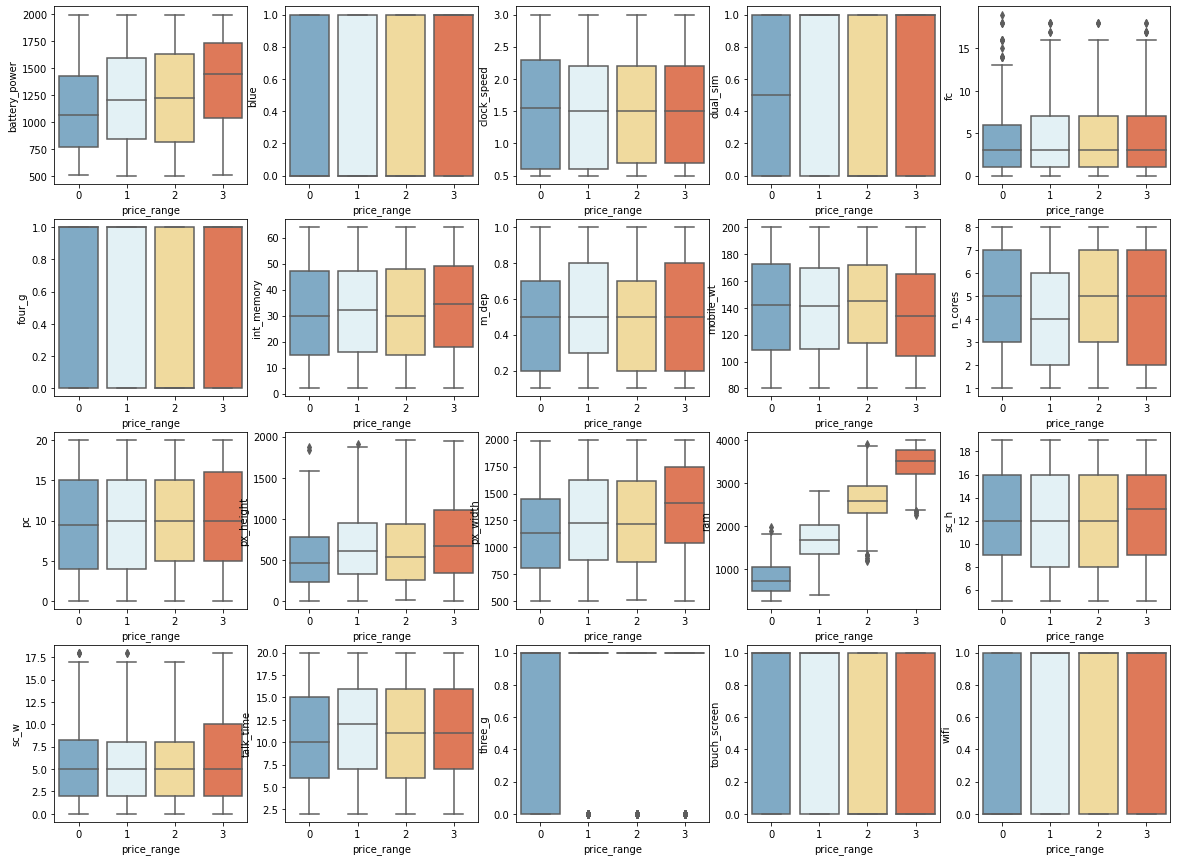

In [ ]:
# plot a graph using box plot (fetures Vs. target class)
fetures = df_mobile.columns[:-1]
lebel = df_mobile.columns[-1]
fig = plt.figure(figsize = (20,15)) 
for i in range(len(fetures)):
  col = fetures[i]
  subp = fig.add_subplot(4,5,i+1)
  sb.boxplot(x=lebel, y=col, data=df_mobile, palette="RdYlBu_r")

In [ ]:
bp_drop = ['blue', 'dual_sim', 'four_g', 'three_g','touch_screen', 'wifi']
df_mobile.drop(bp_drop, inplace=True, axis=1)

The use of a boxplot is to find out the relationship between each feature with the target class. If the distribution of the target classes is equal, then this feature does not affect the classification, in contrast, it has an effect on the time efficiency when classifying. As shown in the box plot, 'blue', 'dual_sim', 'four_g', 'three_g','touch_screen' and 'wifi' have equal target class values, which necessitates their exclusion at the classification stage.

In [ ]:
# check relationship(correlation) between the features using correlation algorithm 
corr_matrix = df_mobile.corr().abs() # convert values to positive
corr_matrix

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
battery_power,1.000000,0.011482,0.033334,0.004004,0.034085,0.001844,0.029727,0.031441,0.014901,0.008402,0.000653,0.029959,0.021421,0.052510,0.200723
clock_speed,0.011482,1.000000,0.000434,0.006545,0.014364,0.012350,0.005724,0.005245,0.014523,0.009476,0.003443,0.029078,0.007378,0.011432,0.006606
fc,0.033334,0.000434,1.000000,0.029133,0.001791,0.023618,0.013356,0.644595,0.009990,0.005176,0.015099,0.011014,0.012373,0.006829,0.021998
int_memory,0.004004,0.006545,0.029133,1.000000,0.006886,0.034214,0.028310,0.033273,0.010441,0.008335,0.032813,0.037771,0.011731,0.002790,0.044435
m_dep,0.034085,0.014364,0.001791,0.006886,1.000000,0.021756,0.003504,0.026282,0.025263,0.023566,0.009434,0.025348,0.018388,0.017003,0.000853
mobile_wt,0.001844,0.012350,0.023618,0.034214,0.021756,1.000000,0.018989,0.018844,0.000939,0.000090,0.002581,0.033855,0.020761,0.006209,0.030302
n_cores,0.029727,0.005724,0.013356,0.028310,0.003504,0.018989,1.000000,0.001193,0.006872,0.024480,0.004868,0.000315,0.025826,0.013148,0.004399
pc,0.031441,0.005245,0.644595,0.033273,0.026282,0.018844,0.001193,1.000000,0.018465,0.004196,0.028984,0.004938,0.023819,0.014657,0.033599
px_height,0.014901,0.014523,0.009990,0.010441,0.025263,0.000939,0.006872,0.018465,1.000000,0.510664,0.020352,0.059615,0.043038,0.010645,0.148858
px_width,0.008402,0.009476,0.005176,0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720,0.165818


In [ ]:
# select the upper triangular of the matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
upper_tri

<ipython-input-14-9fbb2785cb7f>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
battery_power,NaN,0.011482,0.033334,0.004004,0.034085,0.001844,0.029727,0.031441,0.014901,0.008402,0.000653,0.029959,0.021421,0.052510,0.200723
clock_speed,NaN,NaN,0.000434,0.006545,0.014364,0.012350,0.005724,0.005245,0.014523,0.009476,0.003443,0.029078,0.007378,0.011432,0.006606
fc,NaN,NaN,NaN,0.029133,0.001791,0.023618,0.013356,0.644595,0.009990,0.005176,0.015099,0.011014,0.012373,0.006829,0.021998
int_memory,NaN,NaN,NaN,NaN,0.006886,0.034214,0.028310,0.033273,0.010441,0.008335,0.032813,0.037771,0.011731,0.002790,0.044435
m_dep,NaN,NaN,NaN,NaN,NaN,0.021756,0.003504,0.026282,0.025263,0.023566,0.009434,0.025348,0.018388,0.017003,0.000853
mobile_wt,NaN,NaN,NaN,NaN,NaN,NaN,0.018989,0.018844,0.000939,0.000090,0.002581,0.033855,0.020761,0.006209,0.030302
n_cores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001193,0.006872,0.024480,0.004868,0.000315,0.025826,0.013148,0.004399
pc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018465,0.004196,0.028984,0.004938,0.023819,0.014657,0.033599
px_height,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.510664,0.020352,0.059615,0.043038,0.010645,0.148858
px_width,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004105,0.021599,0.034699,0.006720,0.165818


In [ ]:
# selecting the columns which are having absolute correlation greater than 0.92 to drop it 
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.92)]
to_drop

[]

A correlation is the one that reveals the relationship between one feature with another feature, so the relationship can be a positive correlation, or it can be a negative correlation, or there is no correlation. If the value approaches 1, then there is no correlation. Through the data that we have, the relationship has no advantage and there is no relationship with others.

## Split Dataset into Training and Testing Set

In [ ]:
def split_data(X,y,i):
  X_train,X_test , y_train,y_test = train_test_split(X,y,train_size=i,random_state=1)
  return X_train,X_test , y_train,y_test

## MinMax Scale

In [ ]:
# Using min-max scaler to set data range from 0 to 1
def min_max_scale(X_train,X_test):
  mm_scaler = MinMaxScaler()
  X_train_scaled = mm_scaler.fit_transform(X_train)
  X_test_scaled = mm_scaler.transform(X_test)
  return X_train_scaled, X_test_scaled


# Modeling

## Experiment 1 (knn Classification)





In [ ]:
## knn function Classification 
## search for the best K parameter for knn classifier
def Knn_classification(X_train, X_test , y_train, y_test):
    # intialize the knn model
    knn = KNeighborsClassifier()
    
    # assind the K's for odd number between 1 to 29
    k_range = list(range(1,31,2))
    parameters = {'n_neighbors' : k_range}
    
    # search for best K using GridSearchCV algorithm
    grid = GridSearchCV(knn,parameters,cv=5, scoring='accuracy', return_train_score=False)
    k = grid.fit(X_train, y_train).best_params_['n_neighbors']
    print("The best K for knn: ",k)
    print()
    knn = KNeighborsClassifier(n_neighbors = k)
    # start time
    start = time.time()
    knn.fit(X_train,y_train)
    # end time
    end = time.time()
    # execution time in second 
    exTime = round(end-start,3)
    knn_y_pred = knn.predict(X_test)
    knn_accuracy = accuracy_score(y_test,knn_y_pred)
    knn_Creport = classification_report(y_test,knn_y_pred)
    cm = confusion_matrix(y_test, knn_y_pred)
    print("Confusion Matrix of knn:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
    disp.plot()
    plt.show()  
    return knn_accuracy, knn_Creport, exTime

## Experiment 2 (Gradient Boosting Classifier)

In [ ]:
## gbc function Classification 
## search for the best learning_rate and n_estimators parameters for gbc classifier
def gbc_classification(X_train, X_test , y_train, y_test):
    # intialize the gbc model
    gbc = GradientBoostingClassifier()
    
    # assind the learning rate and n_estimators tuning in list
    learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
    n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
    parameters = {'learning_rate' : learning_rate, 'n_estimators' : n_estimators}
    
    # search for best learning_rate and n_estimators using GridSearchCV algorithm
    grid = GridSearchCV(gbc,parameters,cv=5, scoring='accuracy', return_train_score=False)
    gridfit = grid.fit(X_train, y_train)
    lRate =gridfit.best_params_['learning_rate']
    nEst = gridfit.best_params_['n_estimators']
    print("The best learning_rate for gbc: ",lRate)
    print("The best n_estimators for gbc: ",nEst)
    gbc = GradientBoostingClassifier(learning_rate = lRate, n_estimators = nEst)
    # start time
    start = time.time()
    gbc.fit(X_train,y_train)
    # end time
    end = time.time()
    # execution time in second 
    exTime = round(end-start,3)
    gbc_y_pred = gbc.predict(X_test)
    gbc_accuracy = accuracy_score(y_test,gbc_y_pred)
    gbc_Creport = classification_report(y_test,gbc_y_pred)
    print()
    cm = confusion_matrix(y_test, gbc_y_pred)
    print("Confusion Matrix of gbc:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbc.classes_)
    disp.plot()
    plt.show()  
    return gbc_accuracy, gbc_Creport, exTime

## Experiment 3 (Gaussian Naive Bayes)

In [ ]:
## gnb function Classification 
## search for the best variance smoothing parameter for gnb classifier
def gnb_classification(X_train, X_test , y_train, y_test):
    # intialize the gnb model
    gnb = GaussianNB()
    
    # assind the var_smoothing tuning in list
    var_smoothing =  np.logspace(0,-9, num=100)
    parameters = {'var_smoothing' : var_smoothing}
    
    # search for best var_smoothing using GridSearchCV algorithm
    grid = GridSearchCV(gnb,parameters,cv=5, scoring='accuracy', return_train_score=False)
    gridfit = grid.fit(X_train, y_train)
    varSmo =gridfit.best_params_['var_smoothing']
    print("The best var_smoothing for gnb: ",varSmo)
    gnb = GaussianNB(var_smoothing = varSmo)
    # start time
    start = time.time()
    gnb.fit(X_train,y_train)
    # end time
    end = time.time()
    # execution time in second 
    exTime = round(end-start,3)
    gnb_y_pred = gnb.predict(X_test)
    gnb_accuracy = accuracy_score(y_test,gnb_y_pred)
    gnb_Creport = classification_report(y_test,gnb_y_pred)
    print()
    cm = confusion_matrix(y_test, gnb_y_pred)
    print("Confusion Matrix of gnb:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
    disp.plot()
    plt.show()  
    return gnb_accuracy, gnb_Creport, exTime

# Evaluation

In [ ]:
# plot line for each algorithm 
def parallel_plot(data, start, end):
    plt.figure(figsize=(10,8)).gca().axes.set_ylim([start,end])
    parallel_coordinates(data, 'Algorithm' , colormap='Paired',marker='o')

In [ ]:
Accurecy = {
    'KNN':[],
    'GBC':[],
    'GNB':[],
}

In [ ]:
exeTime = {
    'KNN':[],
    'GBC':[],
    'GNB':[],
}

====================================== 0.6 ======================================
******** KNN ********
The best K for knn:  27

Confusion Matrix of knn:


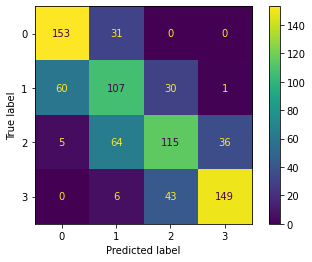


******** GBC ********
The best learning_rate for gbc:  0.1
The best n_estimators for gbc:  200

Confusion Matrix of gbc:


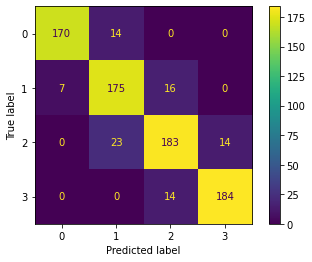


******** GNB ********
The best var_smoothing for gnb:  0.2848035868435802

Confusion Matrix of gnb:


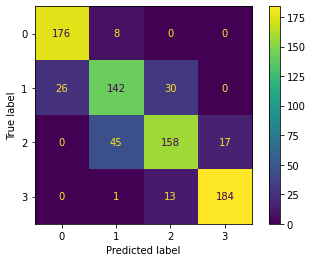

====================================== 0.7 ======================================
******** KNN ********
The best K for knn:  29

Confusion Matrix of knn:


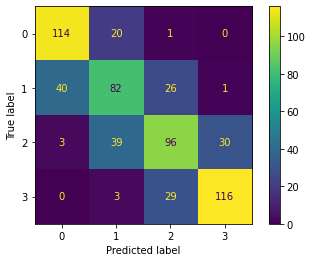


******** GBC ********
The best learning_rate for gbc:  0.2
The best n_estimators for gbc:  64

Confusion Matrix of gbc:


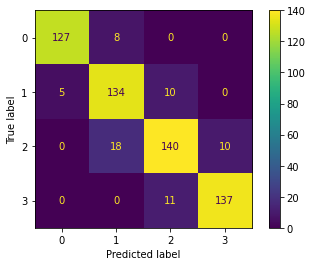


******** GNB ********
The best var_smoothing for gnb:  0.12328467394420659

Confusion Matrix of gnb:


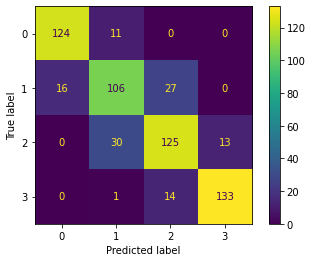

====================================== 0.8 ======================================
******** KNN ********
The best K for knn:  25

Confusion Matrix of knn:


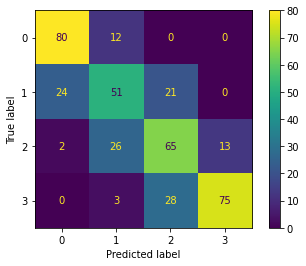


******** GBC ********
The best learning_rate for gbc:  0.1
The best n_estimators for gbc:  200

Confusion Matrix of gbc:


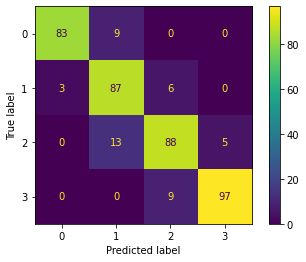


******** GNB ********
The best var_smoothing for gnb:  0.12328467394420659

Confusion Matrix of gnb:


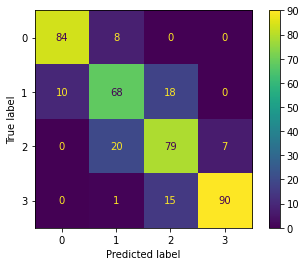

In [ ]:
train_size = [0.6,0.7,0.8]
for i in train_size:
    # Extact features in X and lebel in y
    X = df_mobile.iloc[:,:-1].values
    y = df_mobile.iloc[:,-1].values
    X_train,X_test , y_train,y_test = split_data(X,y,i)
    X_train_scaled, X_test_scaled =min_max_scale(X_train,X_test)
    print("====================================== %0.1f ======================================"%i)
    print("******** KNN ********")
    knn_accuracy, knn_Creport, knn_exTime = Knn_classification(X_train_scaled,X_test_scaled , y_train,y_test)
    print("\n******** GBC ********")
    gbc_accuracy, gbc_Creport, gbc_exTime = gbc_classification(X_train_scaled, X_test_scaled , y_train, y_test)
    print("\n******** GNB ********")
    gnb_accuracy, gnb_Creport, gnb_exTime = gnb_classification(X_train_scaled, X_test_scaled , y_train, y_test)
    Accurecy['KNN'].append(knn_accuracy)
    Accurecy['GBC'].append(gbc_accuracy)
    Accurecy['GNB'].append(gnb_accuracy)
    exeTime['KNN'].append(knn_exTime)
    exeTime['GBC'].append(gbc_exTime)
    exeTime['GNB'].append(gnb_exTime)
    print("================================================================================")

Here I implement three different classifications which are **KNN, GBC, and GNB.**

The previous diagrams show the confusion Matrix for the three classifiers with three different train sizes. Started with **60%** then **70%** and finally with **80%** of the data.

I got the best results with the size of **70%** of the data, If we take a look at the confusion matrixes for **70%** of the data we obtain from it the KNN got **the best classification** it all most classify correctly with small errors of classification.

In [ ]:
dfAcc = pd.DataFrame(Accurecy,index=train_size)
dfAcc = dfAcc.T
dfAcc = dfAcc.rename_axis('Algorithm').reset_index()
dfAcc

,Algorithm,0.6,0.7,0.8
0,KNN,0.655,0.680000,0.6775
1,GBC,0.890,0.896667,0.8875
2,GNB,0.825,0.813333,0.8025


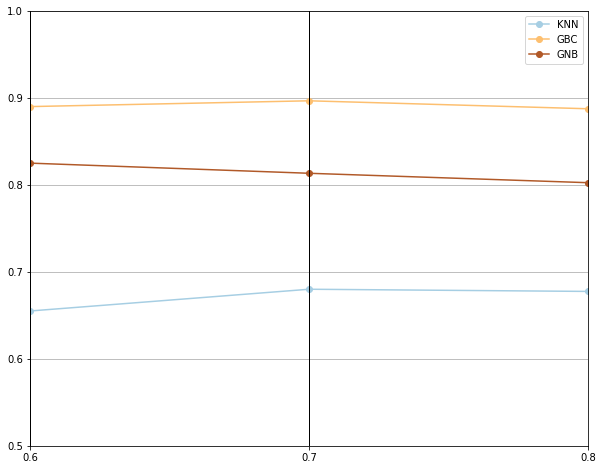

In [ ]:
parallel_plot(dfAcc,0.5,1)

This **Diagram** **summarises** the **accuracy** of the tree classifiers with the three different training data sizes.

II obtained from this diagram the **KNN** is the best of the three for classifying this data, as shown up there it gets more than **90%** **accuracy **with all different training data sizes.

In [ ]:
dfexeTime = pd.DataFrame(exeTime,index=train_size)
dfexeTime = dfexeTime.T
dfexeTime = dfexeTime.rename_axis('Algorithm').reset_index()
dfexeTime

,Algorithm,0.6,0.7,0.8
0,KNN,0.004,0.004,0.004
1,GBC,3.231,1.183,4.142
2,GNB,0.001,0.002,0.002


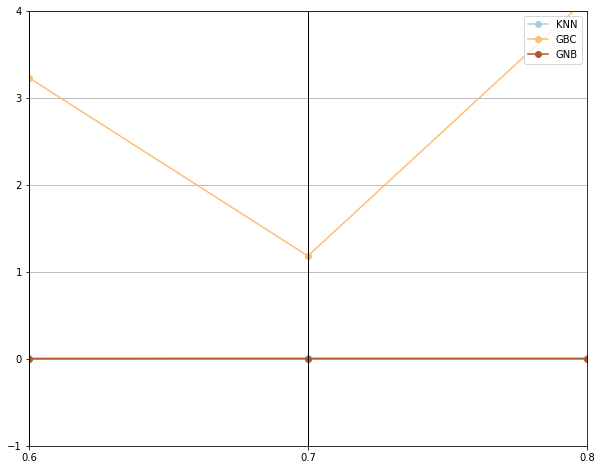

In [ ]:
parallel_plot(dfexeTime,-1,4)

Regarding the execution time **DBC** is the worst one because it takes too much time to execute, on the other hand, both **KNN** and **GNB** are fast in execution and they almost have the same execution time.

# I created github account you can see this project in this link:
https://github.com/s120615/Machine-Learning/issues

# Reference: 

BHATI, V. I. (2018, June 10). Mobile price prediction. Kaggle. Retrieved October 22, 2022, from https://www.kaggle.com/code/vikramb/mobile-price-prediction/notebook 